# Relatório de Análise VIII

## Identificando e Removendo Outliers

In [3]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
plt.rc('figure', figsize = (14, 6))

In [4]:
dados = pd.read_csv('dados/aluguel_residencial.csv', sep = ';')

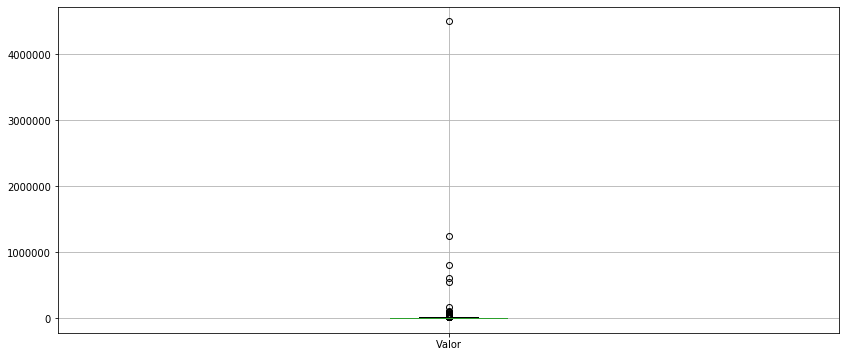

In [5]:
dados.boxplot(['Valor'])

In [6]:
dados[dados['Valor'] >= 500000]

,Unnamed: 0,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
7629,7894,Apartamento,Barra da Tijuca,1,1,0,65,600000.0,980.0,120.0
10636,11013,Casa de Condomínio,Freguesia (Jacarepaguá),4,2,3,163,800000.0,900.0,0.0
12661,13099,Apartamento,Freguesia (Jacarepaguá),2,2,1,150,550000.0,850.0,150.0
13846,14325,Apartamento,Recreio dos Bandeirantes,3,2,1,167,1250000.0,1186.0,320.0
15520,16056,Apartamento,Botafogo,4,1,1,300,4500000.0,1100.0,0.0


In [7]:
valor = dados['Valor']

<img src="Box-plot.png" width=70%>


In [8]:
Q1 = valor.quantile(.25)

In [9]:
Q1

1600.0

In [10]:
Q3 = valor.quantile(.75)

In [11]:
IIQ = Q3 - Q1
limite_inferior = Q1 - 1.5 * IIQ
limite_superior = Q3 + 1.5 * IIQ

In [12]:
selecao = (valor >= limite_inferior) & (valor <= limite_superior)

In [13]:
dados_new = dados[selecao]

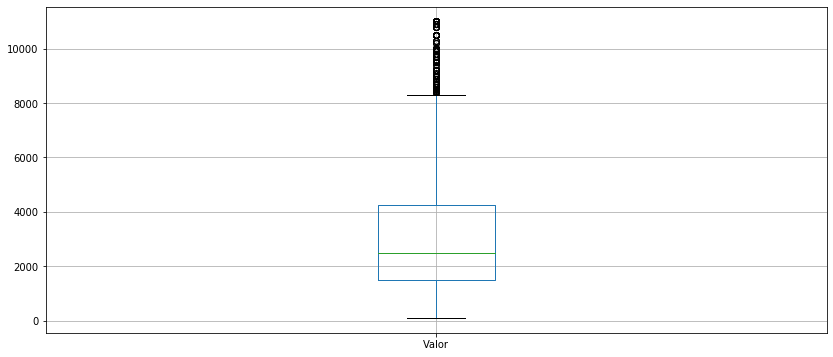

In [14]:
dados_new.boxplot(['Valor'])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000022EB13B5F88>]],
      dtype=object)

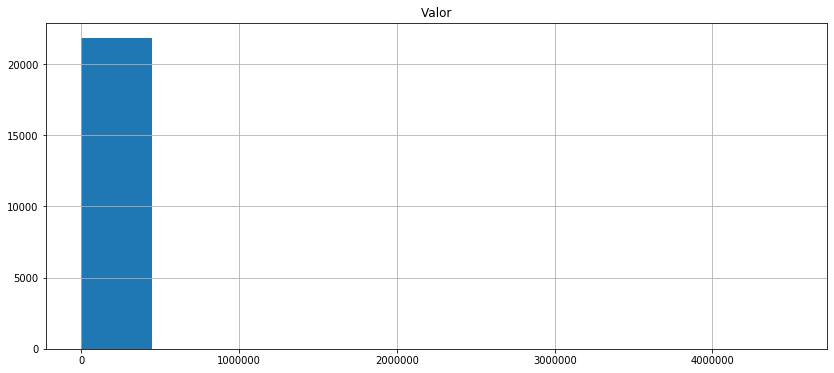

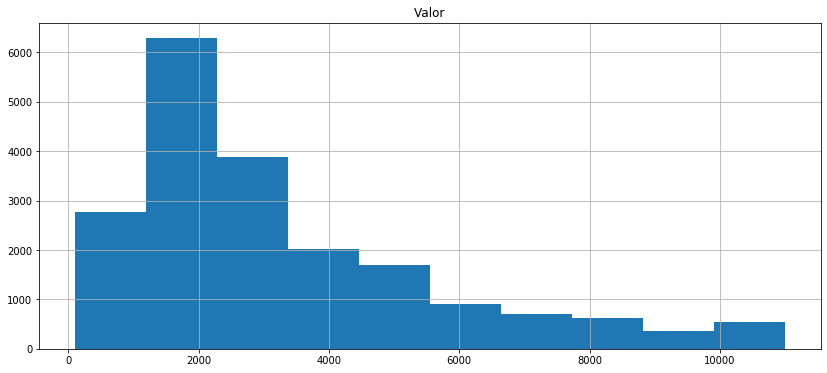

In [15]:
dados.hist(['Valor'])
dados_new.hist(['Valor'])

In [16]:
aula = pd.read_csv('dados/aluguel_amostra.csv', sep = ';')

In [17]:
aula

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor m2,Tipo Agregado
0,Apartamento,Recreio dos Bandeirantes,3,2,1,320,3200.0,1319.0,0.0,10.00,Apartamento
1,Apartamento,Maracanã,2,0,0,59,800.0,725.0,47.0,13.56,Apartamento
2,Apartamento,Leblon,3,2,1,147,7500.0,1000.0,381.0,51.02,Apartamento
3,Apartamento,São Conrado,3,3,3,270,14999.0,2800.0,1200.0,55.55,Apartamento
4,Apartamento,Tijuca,2,1,0,65,1200.0,640.0,97.0,18.46,Apartamento
...,...,...,...,...,...,...,...,...,...,...,...
9995,Apartamento,Copacabana,3,1,2,160,15500.0,1600.0,435.0,96.88,Apartamento
9996,Apartamento,Copacabana,4,0,0,190,6000.0,1000.0,0.0,31.58,Apartamento
9997,Apartamento,Barra da Tijuca,2,1,1,70,2800.0,750.0,160.0,40.00,Apartamento
9998,Apartamento,Tijuca,1,0,0,50,1700.0,360.0,20.0,34.00,Apartamento


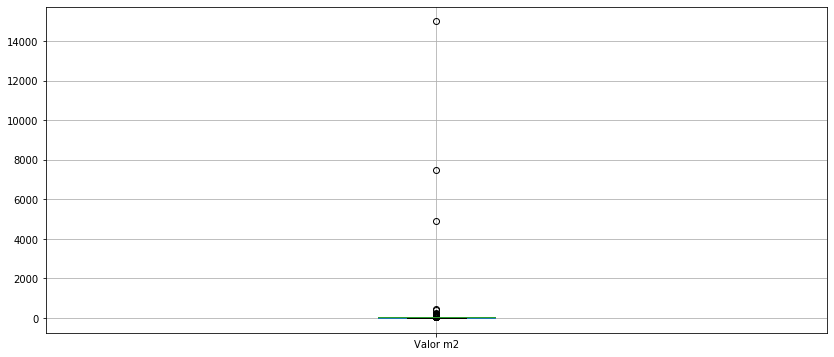

In [18]:
aula.boxplot(['Valor m2'])

In [19]:
numeros = aula['Valor m2']

In [20]:
Q1 = numeros.quantile(.25)

In [21]:
Q1

21.25

In [22]:
Q3 = numeros.quantile(.75)

In [23]:
Q3

42.31

In [24]:
IIQ = Q3 - Q1
limite_inferior = Q1 - 1.5 * IIQ
limite_superior = Q3 + 1.5 * IIQ

In [25]:
IIQ

21.060000000000002

In [26]:
limite_inferior

-10.340000000000003

In [27]:
limite_superior

73.9

## Identificando e Removendo Outliers

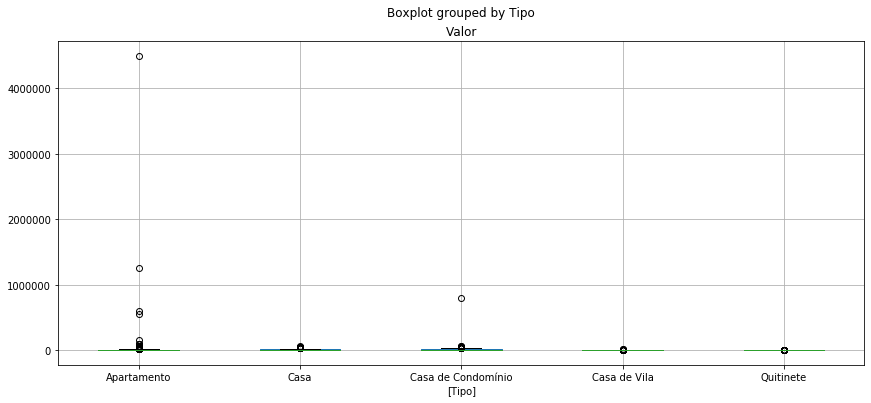

In [28]:
dados.boxplot(['Valor'], by = ['Tipo'])

In [35]:
grupo_tipo = dados.groupby('Tipo')['Valor']

In [30]:
type(grupo_tipo)

pandas.core.groupby.generic.DataFrameGroupBy

In [38]:
Q1 = grupo_tipo.quantile(.25)
Q3 = grupo_tipo.quantile(.75)
IIQ = Q3 - Q1
limite_inferior = Q1 - 1.5 * IIQ
limite_superior = Q3 + 1.5 * IIQ

In [39]:
Q1
Q3
IIQ
limite_inferior
limite_superior

Tipo
Apartamento            9950.0
Casa                  22850.0
Casa de Condomínio    32125.0
Casa de Vila           3375.0
Quitinete              2400.0
Name: Valor, dtype: float64

In [40]:
Q1

Tipo
Apartamento           1700.0
Casa                  1100.0
Casa de Condomínio    4000.0
Casa de Vila           750.0
Quitinete              900.0
Name: Valor, dtype: float64

In [41]:
IIQ

Tipo
Apartamento            3300.0
Casa                   8700.0
Casa de Condomínio    11250.0
Casa de Vila           1050.0
Quitinete               600.0
Name: Valor, dtype: float64

In [43]:
dados_new = pd.DataFrame()
for tipo in grupo_tipo.groups.keys():
    eh_tipo = dados['Tipo'] == tipo
    eh_dentro_limite = (dados['Valor'] >= limite_inferior[tipo]) & (dados['Valor'] <= limite_superior[tipo])
    selecao = eh_tipo & eh_dentro_limite
    dados_selecao = dados[selecao]
    dados_new = pd.concat([dados_new, dados_selecao])

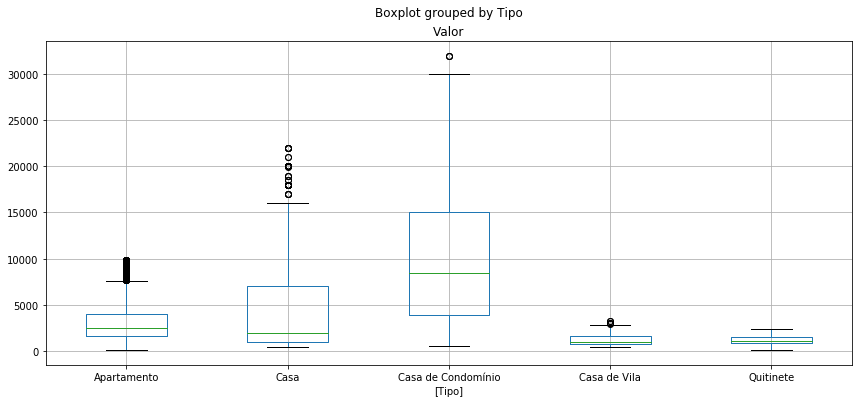

In [47]:
dados_new.boxplot(['Valor'], by = ['Tipo'])
dados_new.to_csv('dados/aluguel_residencial_sem_outliers.csv', sep = ';', index = False)